In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import torch
from model.model_load import load_model

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
record = pd.read_csv('log/log.txt', sep='|')
record.head(3)

cols = list(record.columns)[1:]
record = record[cols]
record.head(3)

,train_loss,valid_loss,train_acc,valid_acc
0,210.785190,212.610299,9.404795,9.064629
1,181.911118,188.517716,9.108356,8.957817
2,165.652721,180.118863,9.048757,9.089678


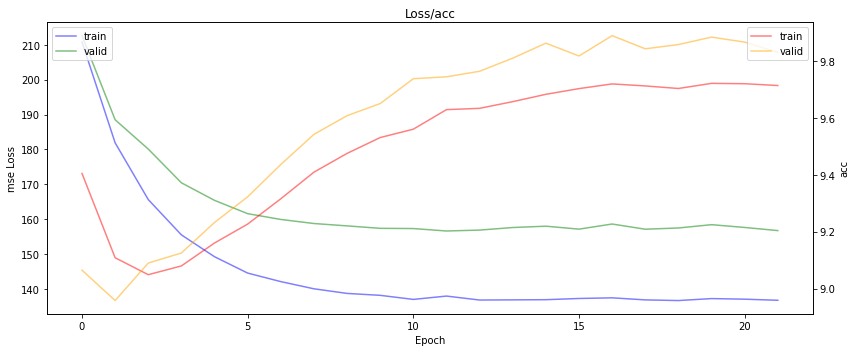

In [4]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.set_title('Loss/acc')
ax.set_xlabel('Epoch')

ax.set_ylabel('mse Loss')
ax.plot(record['train_loss'], color='blue', alpha=0.5)
ax.plot(record['valid_loss'], color='green', alpha=0.5)

ax2.set_ylabel('acc')
ax2.plot(record['train_acc'], color='red', alpha=0.5)
ax2.plot(record['valid_acc'], color='orange', alpha=0.5)

ax.legend(['train', 'valid'], loc='upper left')
ax2.legend(['train', 'valid'], loc='upper right')

# ax.set_xticks(gdp['date'].dt.date)
# ax.set_xticklabels(gdp['date'].dt.year, rotation=90)
# ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config=''
model = load_model(device, config, name='LSTM')

In [6]:
checkpoint_path='ckpt/best3.pth'

In [7]:
ckpt = torch.load(checkpoint_path)
model.load_state_dict(ckpt)

RuntimeError: Error(s) in loading state_dict for LSTMBase:
	Missing key(s) in state_dict: "lstm.weight_ih_l2", "lstm.weight_hh_l2", "lstm.bias_ih_l2", "lstm.bias_hh_l2". 
	size mismatch for lstm.weight_ih_l0: copying a param with shape torch.Size([16, 7]) from checkpoint, the shape in current model is torch.Size([64, 7]).
	size mismatch for lstm.weight_hh_l0: copying a param with shape torch.Size([16, 4]) from checkpoint, the shape in current model is torch.Size([64, 16]).
	size mismatch for lstm.bias_ih_l0: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for lstm.bias_hh_l0: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for lstm.weight_ih_l1: copying a param with shape torch.Size([16, 4]) from checkpoint, the shape in current model is torch.Size([64, 16]).
	size mismatch for lstm.weight_hh_l1: copying a param with shape torch.Size([16, 4]) from checkpoint, the shape in current model is torch.Size([64, 16]).
	size mismatch for lstm.bias_ih_l1: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for lstm.bias_hh_l1: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for fc.weight: copying a param with shape torch.Size([1, 4]) from checkpoint, the shape in current model is torch.Size([1, 16]).

In [ ]:
df = pd.read_excel('total_set.xlsx')

In [ ]:
weather_cols = ['rain', 'wind', 'humidity', 'pressure', 'snow', 'cloud', 'visibility']
sensor_cols = ['Vertical', 'Horizontal', 'Module', 'Outdoor']

In [ ]:
import joblib
scaler_filename = 'ckpt/scaler.save'
scaler = joblib.load(scaler_filename)

In [ ]:
input_df=df[weather_cols]
target_df = df[['total']]

In [ ]:
from torch import FloatTensor

sc_x = scaler.transform(input_df.values[:100])
X_tensor = FloatTensor(sc_x)

In [ ]:
outputs = model(X_tensor)

In [ ]:
pred = outputs.float().detach().numpy().ravel()
target = target_df.values[:100].ravel()

In [ ]:
fig = plt.figure(figsize=(20, 5))
plt.plot(pred, color='r', label='predict', alpha=0.5)
plt.plot(target, color='b', label='actual', alpha=0.5)
plt.show()